## Weekends at Favorita - Exploratory Data Analysis

***Francisca Dias***

## Table of Contents

* [Introduction](#Introduction)


* [Libraries](#Libraries)


* [Transactions](#Transactions)


* [Stores](#Stores)


* [Items](#Items)


* [Items,Transactions and Train Data](#ItemsTransactionsandTrainData)

**Note**:This dataset was taken from www.kaggle.com

## <a id='introduction'>Introduction</a>

In this dataset we have data on sales over time and by store for a large number of products sold by Corporacion Favorita in Ecuador. 


There are also a number of other data files given on transactions, store information, and holidays. Their is an enormous amount of data to process and explore here.

The training data is almost 5.0 Gb in size on disk. 

For this reason I downloaded only the information relative to the year 2016.

## <a id='Libraries'>Libraries</a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
holidays_events_df = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/holidays_events.csv', 
                              low_memory=False)
items_df = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/items.csv', 
                    low_memory=False)
oil_df = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/oil.csv', 
                  low_memory=False)
stores_df = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/stores.csv', 
                     low_memory=False)
transactions_df = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/transactions.csv', 
                           low_memory=False)

## <a id='Transactions'>Transactions</a>

I will start by changing some columns on this data set. Add columns **Month** and **day of the week**.

There might be some sort of seasonality when it comes to the month, therefore I want to see if there´s a month that has more transactions than other months.

Also, my feeling is that people tend to shop more on Weekends than any other day of the week, so for this purposes, I will add a column with the day of the week to confirm my hypothesis.

In [4]:
import calendar

transactions_df["year"] = transactions_df["date"].astype(str).str[:4].astype(np.int64)
transactions_df["month"] = transactions_df["date"].astype(str).str[5:7].astype(np.int64)
transactions_df['date'] = pd.to_datetime(transactions_df['date'], errors ='coerce')
transactions_df['day_of_week'] = transactions_df['date'].dt.weekday_name


transactions_df["year"] = transactions_df["year"].astype(str)
transactions_df.head()

,date,store_nbr,transactions,year,month,day_of_week
0,2013-01-01,25,770,2013,1,Tuesday
1,2013-01-02,1,2111,2013,1,Wednesday
2,2013-01-02,2,2358,2013,1,Wednesday
3,2013-01-02,3,3487,2013,1,Wednesday
4,2013-01-02,4,1922,2013,1,Wednesday


**Transactions by Month**

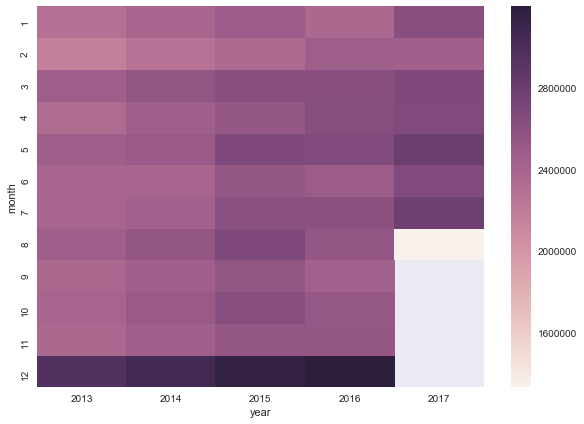

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
x = transactions_df.groupby(['month', 'year'], as_index=False).agg({'transactions':'sum'})
y = x.pivot("month", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y);

**December** is the month with more transactions. We can also see that as we go forward in time, the number os transactions increase, as the map is getting darker. Please note that, since we dont have data for the last semester of 2017, the squares are left blank.

**Transactions by day of the week**

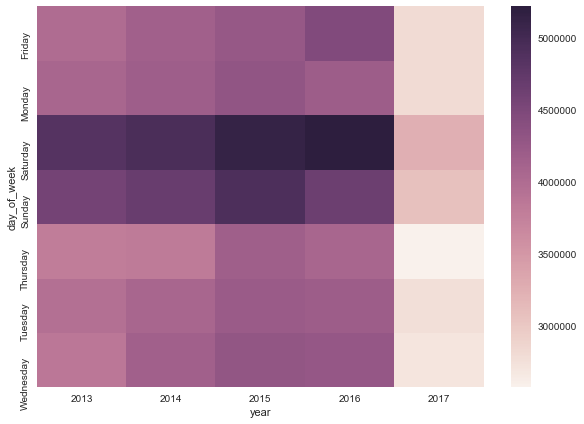

In [5]:
x = transactions_df.groupby(['day_of_week', 'year'], as_index=False).agg({'transactions':'sum'})
y = x.pivot("day_of_week", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y);

Apparently my suspicions were correct: **Sunday** and **Saturday** are the most prefered days to shop at the Favorita.

## <a id='Stores'>Stores</a>

In [6]:
regions_data = {
        
        'region': ['Sierra','Sierra','Sierra','Sierra', 'Sierra', 'Sierra', 'Sierra', 'Sierra', 
                   'Costa', 'Costa', 'Costa', 'Costa', 'Costa', 'Costa' , 'Costa' , 'Oriente'],
        
    
        'state': ['Imbabura','Tungurahua', 'Pichincha', 'Azuay', 'Bolivar', 'Chimborazo', 
                 'Loja', 'Cotopaxi', 'Esmeraldas', 'Manabi', 'Santo Domingo de los Tsachilas', 
                 'Santa Elena', 'Guayas', 'El Oro', 'Los Rios', 'Pastaza']}

df_regions = pd.DataFrame(regions_data, columns = ['region', 'state'])
df_regions_cities = pd.merge(df_regions, stores_df, on='state')


transactions_regions = pd.merge(transactions_df, df_regions_cities, on='store_nbr')
transactions_regions.head()

,date,store_nbr,transactions,year,month,day_of_week,region,state,city,type,cluster
0,2013-01-01,25,770,2013,1,Tuesday,Costa,Santa Elena,Salinas,D,1
1,2013-01-02,25,1038,2013,1,Wednesday,Costa,Santa Elena,Salinas,D,1
2,2013-01-03,25,887,2013,1,Thursday,Costa,Santa Elena,Salinas,D,1
3,2013-01-04,25,1054,2013,1,Friday,Costa,Santa Elena,Salinas,D,1
4,2013-01-05,25,1355,2013,1,Saturday,Costa,Santa Elena,Salinas,D,1


**Transactions by State**

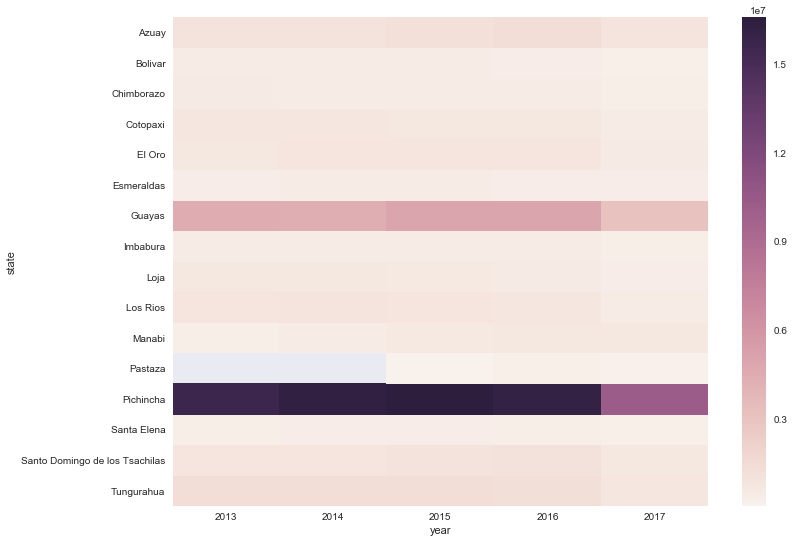

In [7]:
x = transactions_regions.groupby(['state', 'year'], as_index=False).agg({'transactions':'sum'})
y = x.pivot("state", "year", "transactions")
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(y);

**Pichincha** and **Guayas** are among the states where Favorita sells more products.

**Transactions by Store Number**

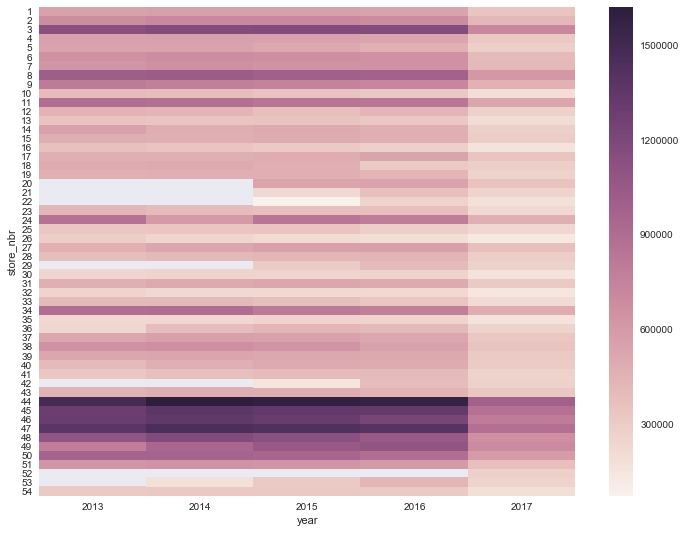

In [8]:
x = transactions_regions.groupby(['store_nbr', 'year'], as_index=False).agg({'transactions':'sum'})
y = x.pivot("store_nbr", "year", "transactions")
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(y);

Stores 44, 45, 46, 47 48 and 50 are winners in transactions.

It is also interesting to see that a few stores only opened after 2013, such as the stores number 20, 21 and 22 that became operational beginning of 2015.

## <a id='Items'>Items</a>

In [9]:
items_df.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


There is a variety of family products being sold at Favorita.

I would like to know what types of products are transactioned more often.

For that purpose, I calculated the percentage of each family product over the total transaction.

I plot the results below.

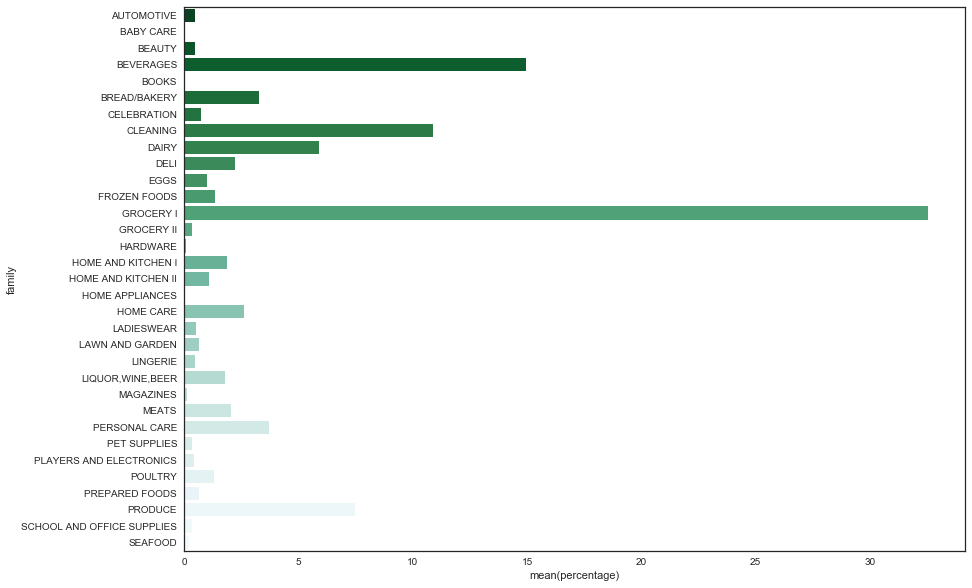

In [10]:
sns.set_style("white")
items_df_family = items_df.groupby(['family']).size().to_frame(name = 'count').reset_index()
items_df_family['percentage']= items_df_family['count']/items_df_family['count'].sum() * 100

fig, ax =plt.subplots(figsize=(14,10))
ax = sns.barplot(x="percentage", y="family", data=items_df_family, palette="BuGn_r")

**Grocery I** takes on more than 30% of all transactions.

Interesting to see that **beverages** comes right after with approximately 12%.

## <a id='ItemsTransactionsandTrainData'>Items,Transactions and Train Data</a>

Since there is more than 125 million rows on the Train data, I will filter this data to show only what happened in store number 25 during 2016.

In [11]:
dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}


train = pd.read_csv('/Users/FranciscaDias/Desktop/Kaggle_Competions/4.Corporacion/train.csv', index_col='id', parse_dates=['date'], dtype=dtypes)
date_mask = (train['date'] >= '2016-01-01') & (train['date'] <= '2016-12-31') & (train['store_nbr'] == 25)
train = train[date_mask]
train.head()

/Users/FranciscaDias/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
66458908,2016-01-01,25,105574,12.0,False
66458909,2016-01-01,25,105575,9.0,False
66458910,2016-01-01,25,105857,3.0,False
66458911,2016-01-01,25,108634,3.0,False
66458912,2016-01-01,25,108701,2.0,True


In [12]:
# Merge and sort date
df_train_item = pd.merge(train, items_df, on='item_nbr').sort_values(by='date')
df_train_item["year"] = df_train_item["date"].astype(str).str[:4].astype(np.int64)
df_train_item["month"] = df_train_item["date"].astype(str).str[5:7].astype(np.int64)
df_train_item.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,year,month
0,2016-01-01,25,105574,12.0,False,GROCERY I,1045,0,2016,1
276059,2016-01-01,25,1464207,7.0,False,BEVERAGES,1114,0,2016,1
51092,2016-01-01,25,406965,6.0,False,CLEANING,3015,0,2016,1
275876,2016-01-01,25,1464201,3.0,False,BEVERAGES,1190,0,2016,1
51193,2016-01-01,25,407499,19.0,True,EGGS,2502,1,2016,1


**Transactions by family type on store 25**

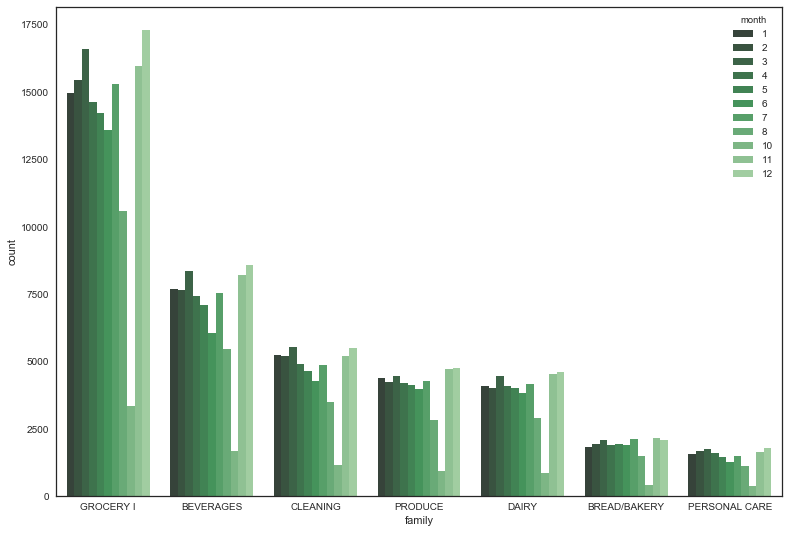

In [13]:
sns.set_style("white")
ax = plt.subplots(figsize=(13, 9))
sns.countplot(x="family", hue="month", data=df_train_item, palette="Greens_d",
              order=df_train_item.family.value_counts().iloc[:7].index);

For store 25, the top 7 family products are : Grocery I, Beverages, Cleaning, Produce, Dairy, Bread/ Bakery and Personal Care. There is a pattern for 2016 in terms of increased transactions for these 7 family products in November and December.

Interesting fact: There is no data for **September**, and in **October** it was open for only two days. This is the reason why there´s such a big drop in transactions.

**What are the top items most bought in store 25 ?**

Too bad we only have the id number, and not the descritpion of the product :)

In [14]:
df_train_item['item_nbr'].value_counts().nlargest(30)

1473474    299
1463862    299
1473475    299
1157329    299
364606     299
1463855    299
913363     299
1463814    299
1463857    299
1473482    299
1958216    299
1422835    299
311994     299
314384     299
1473477    299
1146496    299
153267     299
1473410    299
305229     299
502331     299
1473394    299
1473393    299
1473425    298
1463825    298
1162382    298
1473404    298
265559     298
1324174    298
1503844    298
1146795    297
Name: item_nbr, dtype: int64